In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# %matplotlib inline
import time

%matplotlib notebook
%matplotlib notebook

Equations that have worked well so far: 

y' = y*y + t, dt = 1, (-3,1), n=5

y' = y - t + 1, dt = 1, (-3,-3) n=6

y' = -3y + 2t, dt = 1, (-3, -2), n=3

## Set y' = F(t,y) expression, initial condition, step size and number of steps, etc.

In [2]:
# y' Function
def y_prime(t, y):
    return -3*y + 2*t

# Equation String
equation_string = "-3y + 2t"

# gif Title
gif_title = "Midterm 1 Practice Problem"

# Initial Condition
initial_condition = (-3,-2)
(t_0, y_0) = initial_condition

# Step Size
change_in_t = 1

# Number of Steps
n = 4

# Arrow Widtch for the Animation
arrow_width = .03

# Animation Window Margin Size
margin = .1

# Equation Title for the Animation
delta_t = u"Δt"
dot = u"●"
equation_title = f"y' = {equation_string}  {dot}  y({t_0})={y_0}  {dot}  {delta_t} = {change_in_t}  {dot}  n={n}"

In [3]:
# Initialize
# margin = .1 #Set @ the Top
t_list = [t_0]
y_list = [y_0]
t = t_0
y = y_0

t_min = t_0 - margin
t_max = t_0 + margin

y_min = y_0 - margin
y_max = y_0 + margin

#Generate the Points
for i in range(n):
    y += change_in_t*y_prime(t, y)
    y_list.append(y)
    t += change_in_t
    t_list.append(t)
    
    if t < n:
        t_min = min(t_min, t-margin)
        t_max = max(t_max, t+margin)
        y_min = min(y_min, y-margin)
        y_max = max(y_max, y+margin)

In [4]:
def animate(j):
    # j is a larger index
    i, r = divmod(j,2)
    t_values = t_list[:i+1]
    y_values = y_list[:i+1]
    
    ax.clear()
    ax.plot(t_values, y_values)
    ax.set_xlim([t_min,t_max])
    ax.set_ylim([y_min,y_max])
    for t_value, y_value in zip(t_values, y_values):
        ax.plot(t_value, y_value, "bo")
    
    
    ax.set_title(equation_title, color = (.1, 0, .95))
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
#     arrow_width = .01 # Set @ the top
    if r == 1:
        x_i, x_i1 = t_list[i], t_list[i+1]
        y_i, y_i1 = y_list[i], y_list[i+1]
        ax.arrow(x=x_i, y=y_i, dx=x_i1-x_i, dy=0, width=arrow_width, color = (.5, 0, .5), length_includes_head=True)
        ax.arrow(x=x_i1, y=y_i, dx=0, dy=y_i1-y_i, width=arrow_width, color = (.5, 0, .5), length_includes_head=True)
        ax.arrow(x=x_i, y=y_i, dx=x_i1-x_i, dy=y_i1-y_i, width=arrow_width, color = "b", length_includes_head=True)
        ax.text(x_i1, y_i, u"Δx"+f"={x_i1-x_i}")
        ax.text(x_i1, y_i1, u"Δy"+f"={y_i1-y_i}")
    else:
        time.sleep(1)

<IPython.core.display.Javascript object>


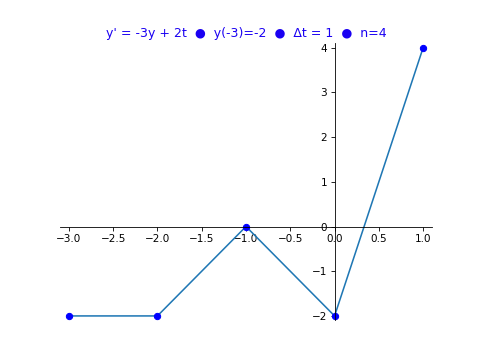

In [5]:
# run the animation

# create the figure and axes objects
fig, ax = plt.subplots()
ax.set_xlim([t_min,t_max])
ax.set_ylim([y_min,y_max])



ani = FuncAnimation(fig, animate, frames=2*n+1, interval=500, repeat=False)


ani.save(f"Animations/Euler's Method for {gif_title}.gif", writer='pillow')
plt.show()


In [6]:
print("t", "\t", "y")
for t, y in zip(t_list, y_list):
    print(t, "\t", y)

t 	 y
-3 	 -2
-2 	 -2
-1 	 0
0 	 -2
1 	 4
